In [1]:
DATA_PATH = '../../data/Regression/processed/3_preprocessed_df.pkl'

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn import svm


In [3]:
df = pd.read_pickle(DATA_PATH)

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3.0,16884.92400
1,18,0,33.770,1,0,2.0,1725.55230
2,28,0,33.000,3,0,2.0,4449.46200
3,33,0,22.705,0,0,1.0,21984.47061
4,32,0,28.880,0,0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,1.0,10600.54830
1334,18,1,31.920,0,0,0.0,2205.98080
1335,18,1,36.850,0,0,2.0,1629.83350
1336,21,1,25.800,0,0,3.0,2007.94500


In [5]:
Y = df["charges"]
X = df.drop('charges',axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20, random_state = 0)

In [6]:
clf = svm.SVR(kernel='linear') 
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)

In [7]:
mean_squared_error(y_pred, Y_test)

173353842.89123803


In [11]:
pow(mean_squared_error(y_pred, Y_test),0.5)

13166.39065542406

In [8]:
mean_absolute_error(y_pred,Y_test)

6664.938043555514

In [15]:
print(explained_variance_score(Y_test,y_pred))

0.1396880938930184


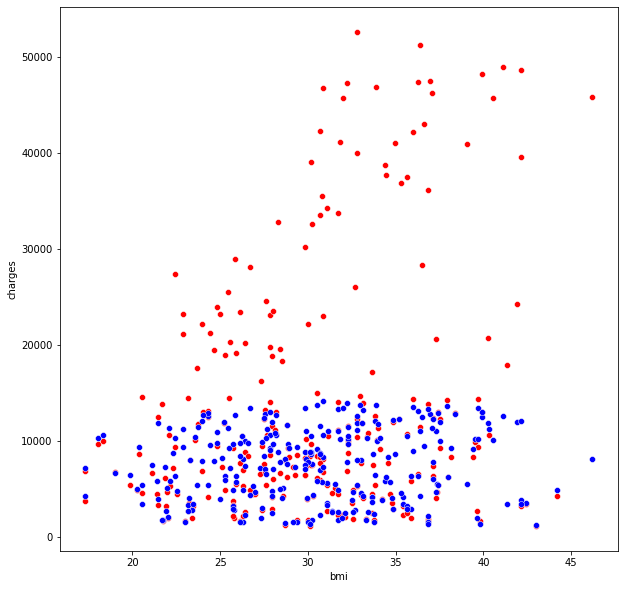

In [14]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=X_test['bmi'],y=Y_test,color='r',palette='Set2')
sns.scatterplot(x=X_test['bmi'],y=y_pred,color='b',palette='Set2')
plt.show()